<a href="https://colab.research.google.com/github/ellencarols/Projeto-PIMG-ArUco/blob/main/detector_aruco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import numpy as np
import matplotlib.pyplot as plt

In [98]:
Aruco = ('Yes-Copy-2-_jpg.rf.eb555c7fd0819f2a20fc77389d4b24a0.jpg')

In [99]:
img = plt.imread(Aruco)

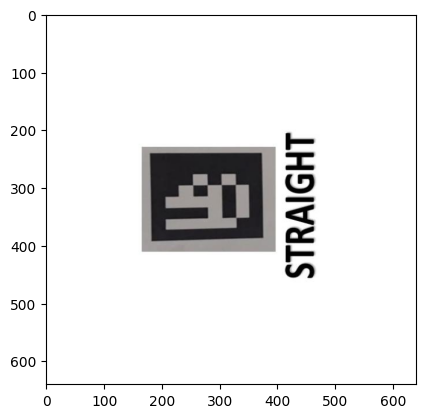

In [100]:
plt.imshow(img)

In [101]:
def rgb_para_cinza(img_rgb):
    """
    Converte uma imagem RGB para escala de cinza.
    """
    # Separação dos canais
    R = img[:, :, 0]
    G = img[:, :, 1]
    B = img[:, :, 2]

    # Conversão ponderada
    img_cinza = 0.299 * R + 0.587 * G + 0.114 * B

    return img_cinza.astype(np.uint8)

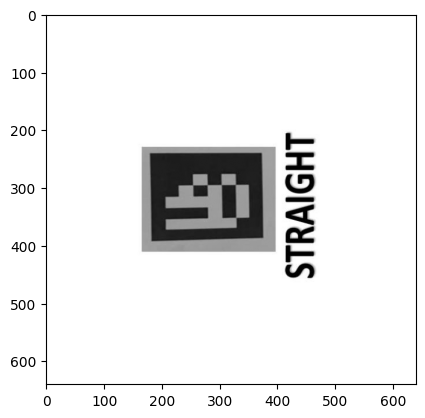

In [102]:
img_cinza = rgb_para_cinza(img)

plt.imshow(img_cinza, cmap="gray")
plt.show()


Filtragem Espacial

Filtro da mediana

In [103]:
def filtro_mediana(img, tamanho=3):
    """
    Aplica filtro da mediana em uma imagem em escala de cinza.
    for for = problema
    """
    altura, largura = img_cinza.shape
    offset = tamanho // 2

    img_filtrada = np.zeros_like(img_cinza)

    for i in range(offset, altura - offset):
        for j in range(offset, largura - offset):
            vizinhanca = img[
                i - offset : i + offset + 1,
                j - offset : j + offset + 1
            ]
            img_filtrada[i, j] = np.median(vizinhanca)

    return img_filtrada.astype(np.uint8)

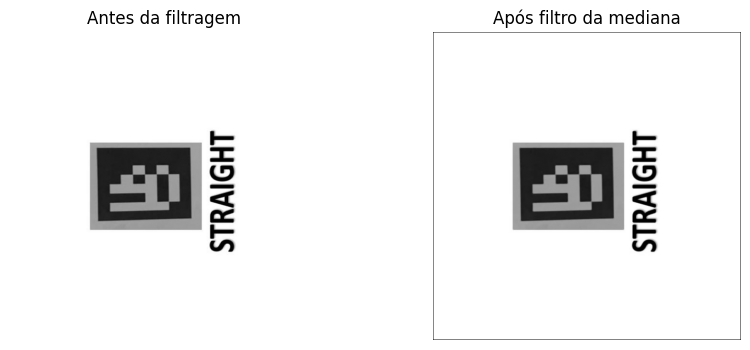

In [104]:
img_suave = filtro_mediana(img_cinza, tamanho=3)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img_cinza, cmap="gray")
plt.title("Antes da filtragem")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_suave, cmap="gray")
plt.title("Após filtro da mediana")
plt.axis("off")

plt.show()


binarização

In [105]:
def mostrar_histograma(imagem_gray):
    hist = np.zeros(256)

    for pixel in img_suave.flatten():
        hist[pixel] += 1

    plt.figure()
    plt.plot(hist)
    plt.xlabel("Nível de cinza")
    plt.ylabel("Número de pixels")
    plt.title("Histograma da imagem")
    plt.show()

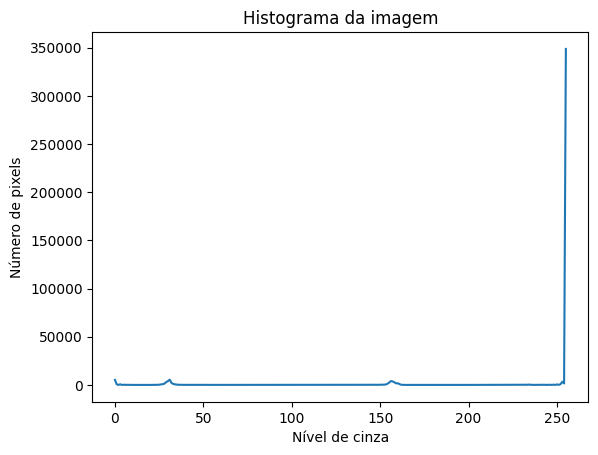

In [106]:
mostrar_histograma(img_suave)

Binarização

In [107]:
def binarizar(imagem_gray, T):
    binaria = np.zeros_like(img_suave)
    binaria[img_suave >= T] = 255
    return binaria

In [108]:
    T = 190
    imagem_bin = binarizar(img_suave, T)

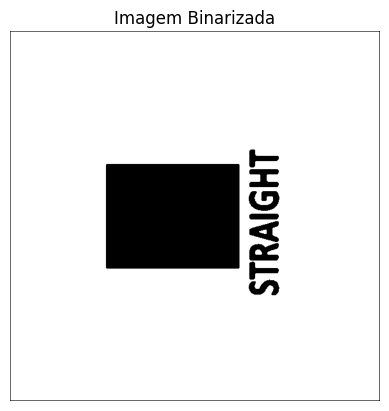

In [109]:
plt.imshow(imagem_bin, cmap='gray')
plt.title("Imagem Binarizada")
plt.axis('off')
plt.show()

Extração de bordas

In [110]:
def bordas_gradiente(imagem_bin):
    h, w = imagem_bin.shape
    # Cria uma matriz de zeros com o mesmo tamanho da original
    bordas = np.zeros_like(imagem_bin)

    # Loop para calcular o gradiente horizontal e vertical
    for i in range(h - 1):
        for j in range(w - 1):
            # Diferença entre pixels vizinhos (Gradiente)
            gx = abs(int(imagem_bin[i + 1, j]) - int(imagem_bin[i, j]))
            gy = abs(int(imagem_bin[i, j + 1]) - int(imagem_bin[i, j]))

            # Se houver variação, marcamos como borda (255)
            if gx + gy > 0:
                bordas[i, j] = 255

    return bordas

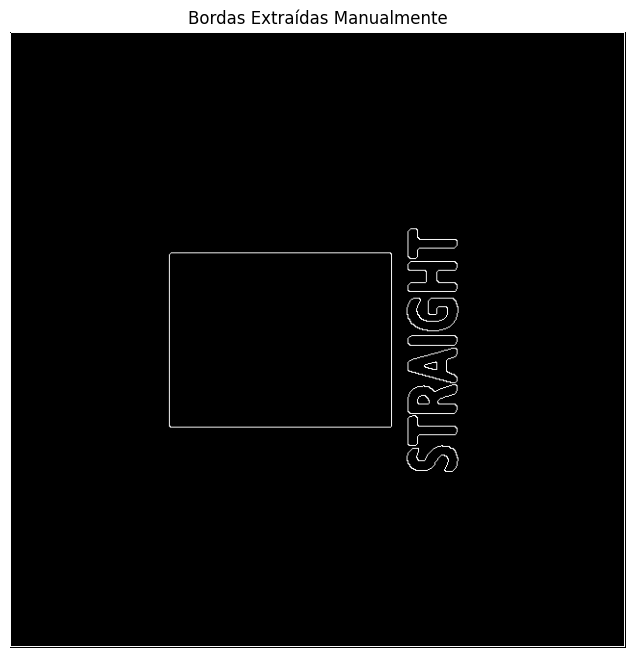

In [111]:
# Supondo que sua imagem binarizada se chama 'img_binaria'
# Chamamos a função e salvamos o resultado na variável 'bordas'
bordas = bordas_gradiente(imagem_bin)

# Agora exibimos o resultado
plt.figure(figsize=(8, 8))
plt.imshow(bordas, cmap='gray')
plt.title("Bordas Extraídas Manualmente")
plt.axis('off')
plt.show()